In [28]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv(r'BORIVALI_DWLR_REALTIME.csv')
# df = df.drop(['station_id', 'land_use_type', 'policy_active'], axis=1)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

In [30]:
df

,timestamp,month,station_id,latitude,longitude,water_level_m,rainfall_mm,demand_mcm,aquifer_area_sqkm,specific_yield,temperature_c,land_use_type,policy_active,delta_h,recharge,availability
0,2023-01-18 17:00:00,1,BOR-01,19.23,72.85,9.006755,0.187270,0.002656,2.0,0.15,25.979920,Urban,False,0.000000,0.000000,-2655.994520
1,2023-01-18 18:00:00,1,BOR-01,19.23,72.85,9.027252,0.029042,0.003208,2.0,0.15,26.167425,Urban,False,-0.020497,0.000000,-3208.072578
2,2023-01-18 19:00:00,1,BOR-01,19.23,72.85,9.024050,0.010292,0.002683,2.0,0.15,25.004426,Urban,False,0.003202,960.540809,-1722.863701
3,2023-01-18 20:00:00,1,BOR-01,19.23,72.85,9.041048,0.152121,0.002791,2.0,0.15,23.182471,Urban,False,-0.016998,0.000000,-2791.229140
4,2023-01-18 21:00:00,1,BOR-01,19.23,72.85,9.030482,0.305926,0.002866,2.0,0.15,23.975405,Urban,False,0.010566,3169.664385,303.302541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,2026-01-17 12:00:00,1,BOR-01,19.23,72.85,3.749250,0.094999,0.003077,2.0,0.15,28.599703,Urban,True,-0.022292,0.000000,-3076.644502
26276,2026-01-17 13:00:00,1,BOR-01,19.23,72.85,3.747730,0.213660,0.003379,2.0,0.15,28.413010,Urban,True,0.001520,455.916372,-2923.232307
26277,2026-01-17 14:00:00,1,BOR-01,19.23,72.85,3.744103,0.054377,0.002512,2.0,0.15,27.836764,Urban,True,0.003627,1088.077726,-1423.819089
26278,2026-01-17 15:00:00,1,BOR-01,19.23,72.85,3.744475,0.069447,0.002540,2.0,0.15,28.592037,Urban,True,-0.000372,0.000000,-2540.227759


In [31]:
def create_features(df):
    df = df.copy()
    df['hour'] = df['timestamp'].dt.hour
    df['dayofweek'] = df['timestamp'].dt.dayofweek
    df['quarter'] = df['timestamp'].dt.quarter
    df['month'] = df['timestamp'].dt.month
    df['year'] = df['timestamp'].dt.year
    df['dayofyear'] = df['timestamp'].dt.dayofyear
    return df

# Apply feature engineering to our historical dataset
df = create_features(df)

In [32]:
df

,timestamp,month,station_id,latitude,longitude,water_level_m,rainfall_mm,demand_mcm,aquifer_area_sqkm,specific_yield,...,land_use_type,policy_active,delta_h,recharge,availability,hour,dayofweek,quarter,year,dayofyear
0,2023-01-18 17:00:00,1,BOR-01,19.23,72.85,9.006755,0.187270,0.002656,2.0,0.15,...,Urban,False,0.000000,0.000000,-2655.994520,17,2,1,2023,18
1,2023-01-18 18:00:00,1,BOR-01,19.23,72.85,9.027252,0.029042,0.003208,2.0,0.15,...,Urban,False,-0.020497,0.000000,-3208.072578,18,2,1,2023,18
2,2023-01-18 19:00:00,1,BOR-01,19.23,72.85,9.024050,0.010292,0.002683,2.0,0.15,...,Urban,False,0.003202,960.540809,-1722.863701,19,2,1,2023,18
3,2023-01-18 20:00:00,1,BOR-01,19.23,72.85,9.041048,0.152121,0.002791,2.0,0.15,...,Urban,False,-0.016998,0.000000,-2791.229140,20,2,1,2023,18
4,2023-01-18 21:00:00,1,BOR-01,19.23,72.85,9.030482,0.305926,0.002866,2.0,0.15,...,Urban,False,0.010566,3169.664385,303.302541,21,2,1,2023,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26275,2026-01-17 12:00:00,1,BOR-01,19.23,72.85,3.749250,0.094999,0.003077,2.0,0.15,...,Urban,True,-0.022292,0.000000,-3076.644502,12,5,1,2026,17
26276,2026-01-17 13:00:00,1,BOR-01,19.23,72.85,3.747730,0.213660,0.003379,2.0,0.15,...,Urban,True,0.001520,455.916372,-2923.232307,13,5,1,2026,17
26277,2026-01-17 14:00:00,1,BOR-01,19.23,72.85,3.744103,0.054377,0.002512,2.0,0.15,...,Urban,True,0.003627,1088.077726,-1423.819089,14,5,1,2026,17
26278,2026-01-17 15:00:00,1,BOR-01,19.23,72.85,3.744475,0.069447,0.002540,2.0,0.15,...,Urban,True,-0.000372,0.000000,-2540.227759,15,5,1,2026,17


In [33]:
targets = ['water_level_m', 'rainfall_mm', 'temperature_c', 'demand_mcm', 'availability']
features = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']

# 4. PREPARING THE FUTURE TIMEFRAME
# We identify the last known timestamp and create a sequence of 24 hourly steps following it.
last_timestamp = df['timestamp'].max()
future_timestamps = pd.date_range(
    start=last_timestamp + pd.Timedelta(hours=1), 
    periods=24, 
    freq='H'
)
future_df = pd.DataFrame({'timestamp': future_timestamps})
future_df = create_features(future_df)

C:\Users\LaukikS\AppData\Local\Temp\ipykernel_23964\3742927880.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_timestamps = pd.date_range(


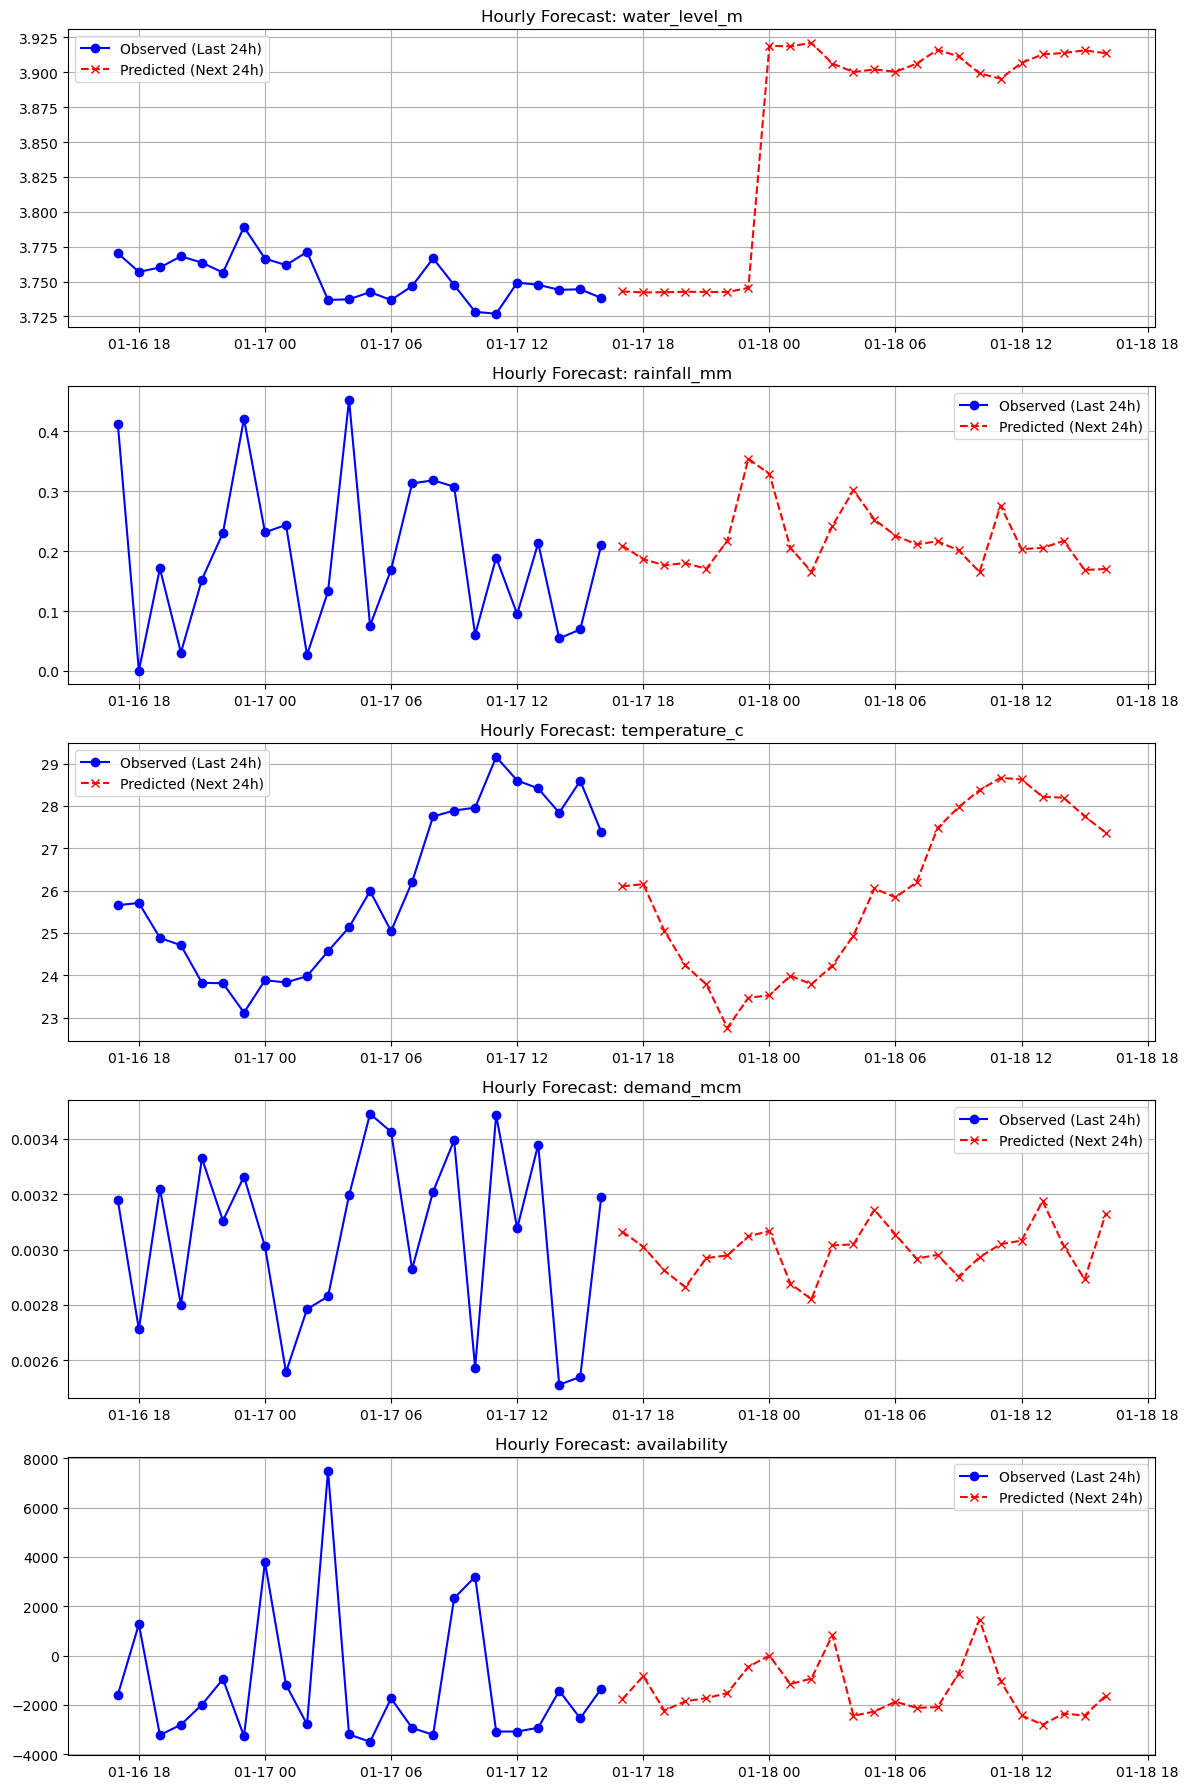

In [34]:
predictions = {}

for target in targets:
    X = df[features]
    y = df[target]
    
    # Using 100 decision trees (n_estimators) to ensure stability in predictions
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    
    # Store the results back into our future dataframe
    future_df[target] = model.predict(future_df[features])

# 6. SAVING THE RESULTS
future_df.to_csv('predictions_next_24h.csv', index=False)

# 7. VISUALIZATION
# To verify the logic, we plot the last 24 hours of real data against the predicted 24 hours.
fig, axes = plt.subplots(len(targets), 1, figsize=(12, 18), sharex=False)
last_24h_history = df.tail(24)

for i, target in enumerate(targets):
    # Plotting historical context
    axes[i].plot(last_24h_history['timestamp'], last_24h_history[target], 
                 label='Observed (Last 24h)', marker='o', color='blue')
    
    # Plotting future forecast
    axes[i].plot(future_df['timestamp'], future_df[target], 
                 label='Predicted (Next 24h)', marker='x', linestyle='--', color='red')
    
    axes[i].set_title(f'Hourly Forecast: {target}')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()